In [781]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from util.utill import utill
import	platform
from matplotlib import rc
import seaborn as sns
rc('font',family='Malgun Gothic')

file1='시도별_1인당_지역내총생산_개인소득.csv' # GrDP: GrDP_list
file2='시도별_경제활동별_지역내총생산.csv'   # 경제활동별_GrDP: part_economic_DF
file3='시군구별_이동자수.csv' # 총전출: total_move_out, 총전입: total_move_in, 순이동: pure_move
file4='연도별_제주등록외국인.xlsx'


In [782]:
GrDP_DF = pd.read_csv(file1, encoding='ms949')
part_economic_DF = pd.read_csv(file2, encoding='ms949', header = None)
move_DF = pd.read_csv(file3, encoding='ms949', header = 0)
Foreigner_DF = pd.read_excel(file4)

In [783]:
GrDP_DF

,시도별,2011,2011.1,2011.2,2011.3,2012,2012.1,2012.2,2012.3,2013,...,2019.2,2019.3,2020,2020.1,2020.2,2020.3,2021 p),2021 p).1,2021 p).2,2021 p).3
0,시도별,1인당 지역내총생산,1인당 지역총소득,1인당 개인소득,1인당 민간소비,1인당 지역내총생산,1인당 지역총소득,1인당 개인소득,1인당 민간소비,1인당 지역내총생산,...,1인당 개인소득,1인당 민간소비,1인당 지역내총생산,1인당 지역총소득,1인당 개인소득,1인당 민간소비,1인당 지역내총생산,1인당 지역총소득,1인당 개인소득,1인당 민간소비
1,제주특별자치도,22041,22372,13888,13236,23525,23138,14383,14186,24491,...,18815,17037,29334,30030,19954,16227,29781,31999,20475,17285


In [784]:
# 리스트에 담기
GrDP_list = []
for n in GrDP_DF.iloc[1]:
    GrDP_list.append(n)
print(GrDP_list)
print(len(GrDP_list))

['제주특별자치도', '22041', '22372', '13888', '13236', '23525', '23138', '14383', '14186', '24491', '24020', '14829', '14416', '25968', '25400', '15329', '14904', '28280', '27314', '16685', '15406', '30284', '29342', '17366', '15711', '31470', '30863', '17816', '16191', '30721', '31193', '18456', '16640', '30792', '30710', '18815', '17037', '29334', '30030', '19954', '16227', '29781', '31999', '20475', '17285']
45


In [785]:
GrDP_list = GrDP_list[9:46:4]
x_GrDP_list = [n for n in range(1, len(GrDP_list)+1)]
GrDP_list  # 1인당 지역내총생산

['24491',
 '25968',
 '28280',
 '30284',
 '31470',
 '30721',
 '30792',
 '29334',
 '29781']

In [786]:
GrDP_list = pd.DataFrame(GrDP_list, index=[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], columns=['1인당 지역내총생산'])
GrDP_list

,1인당 지역내총생산
2013,24491
2014,25968
2015,28280
2016,30284
2017,31470
2018,30721
2019,30792
2020,29334
2021,29781


In [787]:
# part_economic_DF.set_index(1)

In [788]:
remove= list(range(4,36,3))
part_economic_DF = part_economic_DF.drop(remove, axis = 1)

In [789]:
remove= list(range(0,36,3))
part_economic_DF = part_economic_DF.drop(remove, axis = 1)
# part_economic_DF
# 8.9  11,12  14,15   17,18

In [790]:
# 농업 임업 및 어업, 건설업, 서비스업, 도매 및 소매업, 부동산업, 숙박 및 음식점업

In [791]:
# 제주도 경제 활동 DataFrame
part_economic_DF = part_economic_DF.drop(1, axis=0)
part_economic_DF= part_economic_DF.drop([6,7,9,10,11,12,13,14,15,16,19,26,27,28,29])
remove_col = part_economic_DF.columns[1:3]
part_economic_DF.drop(remove_col, axis=1,inplace=True)
part_economic_DF

,1,8,11,14,17,20,23,26,29,32
0,경제활동별,2013,2014,2015,2016,2017,2018,2019,2020,2021 p)
2,지역내총생산(시장가격),13960947,15147843,16946709,18719373,19981072,20051121,20308737,19615758,20048530
3,순생산물세,982095,1162083,1387852,1628453,1740038,1630898,1619902,1589257,1627050
4,총부가가치(기초가격),12978852,13985760,15558857,17090920,18241034,18420223,18688835,18026501,18421480
5,"농업, 임업 및 어업",1903060,1703567,1715518,1831771,2050327,1821788,1676001,1969935,1988511
8,제조업,480110,528320,647834,730490,793215,772052,732755,709583,725023
17,건설업,1118161,1251124,1530408,1964929,2283830,1958260,1831012,1507163,1269463
18,서비스업,9183409,10147471,11254739,12152638,12774381,13599039,14209875,13528641,14206820
20,운수 및 창고업,607134,710514,906359,1007918,823130,902484,886011,705047,797971
21,숙박 및 음식점업,703941,752130,884623,1058591,1094171,1184246,1260099,1092474,1207205


In [792]:
# part_economic_DF = part_economic_DF.set_index(1)
# part_economic_DF

In [793]:
print(type(part_economic_DF.columns))

<class 'pandas.core.indexes.numeric.Int64Index'>


In [794]:
move_DF = move_DF.T
move_DF

,0,1
행정구역(시군구)별,행정구역(시군구)별,제주특별자치도
2023.04,총전입 (명),5822
2023.04.1,총전출 (명),5640
2023.04.2,순이동 (명),182
2023.04.3,시도내이동-시군구내 (명),2881
...,...,...
2022.1,총전출 (명),83717
2022.2,순이동 (명),3148
2022.3,시도내이동-시군구내 (명),43458
2022.4,시도내이동-시군구간 전입 (명),8459


In [795]:
move_DF = move_DF.set_index(0)
move_DF

,1
0,
행정구역(시군구)별,제주특별자치도
총전입 (명),5822
총전출 (명),5640
순이동 (명),182
시도내이동-시군구내 (명),2881
...,...
총전출 (명),83717
순이동 (명),3148
시도내이동-시군구내 (명),43458


In [796]:
move_DF

,1
0,
행정구역(시군구)별,제주특별자치도
총전입 (명),5822
총전출 (명),5640
순이동 (명),182
시도내이동-시군구내 (명),2881
...,...
총전출 (명),83717
순이동 (명),3148
시도내이동-시군구내 (명),43458


In [797]:
move_DF = move_DF.T
move_DF

,행정구역(시군구)별,총전입 (명),총전출 (명),순이동 (명),시도내이동-시군구내 (명),시도내이동-시군구간 전입 (명),시도내이동-시군구간 전출 (명),총전입 (명),총전출 (명),순이동 (명),...,순이동 (명),시도내이동-시군구내 (명),시도내이동-시군구간 전입 (명),시도내이동-시군구간 전출 (명),총전입 (명),총전출 (명),순이동 (명),시도내이동-시군구내 (명),시도내이동-시군구간 전입 (명),시도내이동-시군구간 전출 (명)
1,제주특별자치도,5822,5640,182,2881,595,595,6265,6259,6,...,3917,48616,9261,9261,86865,83717,3148,43458,8459,8459


In [798]:
total_move_in = move_DF.iloc[:, 19:80:6]
# total_move_in

In [799]:
total_move_in

,총전입 (명),총전입 (명),총전입 (명),총전입 (명),총전입 (명),총전입 (명),총전입 (명),총전입 (명),총전입 (명),총전입 (명),총전입 (명)
1,79501,88851,92508,97580,106825,105027,104202,94966,98114,94979,86865


In [800]:
# 연도멸 총 전입 구하기
new_column_names = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',]
total_move_in.columns = new_column_names
new_index = ['총전입 ']
# total_move_in = total_move_in.set_axis(new_index, axis='index', inplace=True)
# remove = ['2022']
# total_move_in.drop(columns=remove, inplace=True)
total_move_in

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,79501,88851,92508,97580,106825,105027,104202,94966,98114,94979,86865


In [801]:
# 총 전출 구하기
total_move_out = move_DF.iloc[:, 20:86:6]
# total_move_out


In [802]:
total_move_out

,총전출 (명),총전출 (명),총전출 (명),총전출 (명),총전출 (명),총전출 (명),총전출 (명),총전출 (명),총전출 (명),총전출 (명),총전출 (명)
1,74625,81028,81396,83323,92193,91022,95349,92030,94736,91062,83717


In [803]:
# 연도별 총 전출 구하기
new_column_names = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
total_move_out.columns = new_column_names
new_index = ['총전출']
# total_move_out = total_move_out.set_axis(new_index, axis='index', inplace=True)
# remove = ['2022']
# total_move_out.drop(columns=remove, inplace=True)
total_move_out

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,74625,81028,81396,83323,92193,91022,95349,92030,94736,91062,83717


In [804]:
pure_move = move_DF.iloc[:, 21:90:6]
# pure_move

In [805]:
pure_move

,순이동 (명),순이동 (명),순이동 (명),순이동 (명),순이동 (명),순이동 (명),순이동 (명),순이동 (명),순이동 (명),순이동 (명),순이동 (명)
1,4876,7823,11112,14257,14632,14005,8853,2936,3378,3917,3148


In [806]:
# 연도별 순 이동 구하기
new_column_names = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
pure_move.columns = new_column_names
new_index = ['순이동 ']
# pure_move = pure_move.set_axis(new_index, axis='index', inplace=True)
# remove = ['2022', '2023.04', '2023.05', '2023.06']'2023.04', '2023.05', '2023.06'
# pure_move.drop(columns=remove, inplace=True)
pure_move

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,4876,7823,11112,14257,14632,14005,8853,2936,3378,3917,3148


In [807]:
print(type(pure_move.columns))

<class 'pandas.core.indexes.base.Index'>


In [808]:
# 연도별 외국인 구하기
Foreigner_DF = Foreigner_DF.set_index('연도')
Foreigner_DF

,2013,2014,2015,2016,2017,2018,2019,2020,2021
연도,,,,,,,,,
전체,12656,15568,19903,22102,25646,24841,25668,22943,20717


In [809]:
plt.figure(figsize=(15,10))
title_size=30

<Figure size 1500x1000 with 0 Axes>

In [810]:
# plt.plot(years, values, marker='o', linestyle='-', color='r', label='증감 추이')  # 선 그래프 그리기
# plt.title('1인당 지역내총생산', fontsize=30)
# plt.xlabel('연도', fontsize=14)
# plt.ylabel('총전출', fontsize=14)
# plt.grid(True)   # 그리드 표시
# plt.legend()     # 범례 표시
# plt.show()    

In [811]:
total_move_out

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,74625,81028,81396,83323,92193,91022,95349,92030,94736,91062,83717


In [812]:
total_move_out.to_csv('total_move_out.csv', index=False)
total_move_in.to_csv('total_move_in.csv', index=False)
pure_move.to_csv('pure_move.csv', index=False)
GrDP_DF.to_csv('GrDP_DF.csv', index=False)
part_economic_DF.to_csv('part_economic_DF.csv', index=False)
Foreigner_DF.to_csv('Foreigner_DF.csv', index=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


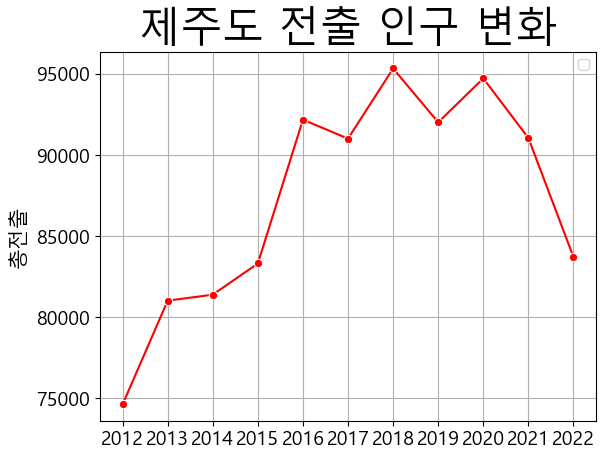

In [813]:
# 제주도 전출 인구 변화 시각화
sns.lineplot(x=total_move_out.columns, y=total_move_out.iloc[0].astype("int"), marker='o', linestyle='-', color='r',)  # 선 그래프 그리기
plt.title('제주도 전출 인구 변화', fontsize=30)
plt.xlabel('')
plt.xticks(size=14)
plt.ylabel('총전출', fontsize=15)
plt.yticks(size=14)
plt.grid(True)   # 그리드 표시
plt.legend()     # 범례 표시
plt.savefig('a.png')
plt.show()    

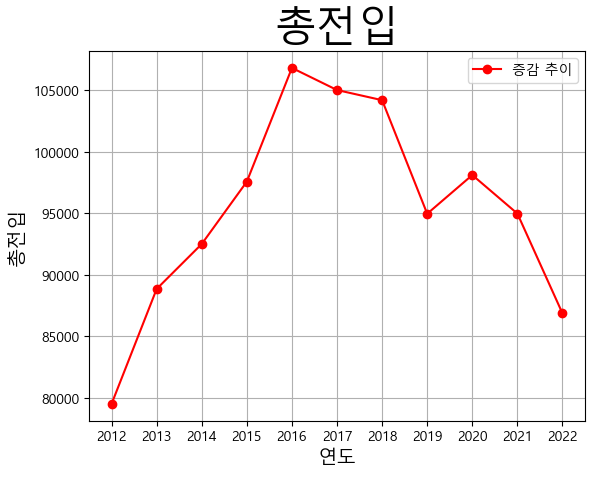

In [815]:
# 총전입 그래프
plt.plot(total_move_in.columns, total_move_in.iloc[0].astype("int"), marker='o', linestyle='-', color='r', label='증감 추이')  # 선 그래프 그리기
plt.title('총전입', fontsize=30)
plt.xlabel('연도', fontsize=14)
plt.ylabel('총전입', fontsize=14)
plt.grid(True)   # 그리드 표시
plt.legend()     # 범례 표시
plt.show()    

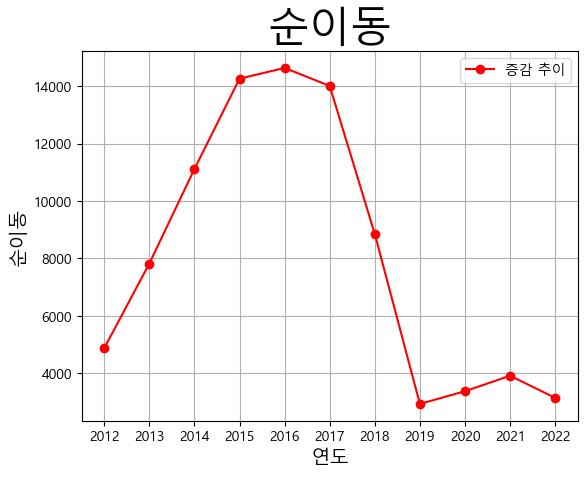

In [816]:
# 순이동 그래프
plt.plot(pure_move.columns, pure_move.iloc[0].astype("int"), marker='o', linestyle='-', color='r', label='증감 추이')  # 선 그래프 그리기
plt.title('순이동', fontsize=30)
plt.xlabel('연도', fontsize=14)
plt.ylabel('순이동', fontsize=14)
plt.grid(True)   # 그리드 표시
plt.legend()     # 범례 표시
plt.show()    

In [818]:
Foreigner_DF.describe()

,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,12656.0,15568.0,19903.0,22102.0,25646.0,24841.0,25668.0,22943.0,20717.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,12656.0,15568.0,19903.0,22102.0,25646.0,24841.0,25668.0,22943.0,20717.0
25%,12656.0,15568.0,19903.0,22102.0,25646.0,24841.0,25668.0,22943.0,20717.0
50%,12656.0,15568.0,19903.0,22102.0,25646.0,24841.0,25668.0,22943.0,20717.0
75%,12656.0,15568.0,19903.0,22102.0,25646.0,24841.0,25668.0,22943.0,20717.0
max,12656.0,15568.0,19903.0,22102.0,25646.0,24841.0,25668.0,22943.0,20717.0


In [819]:
Foreigner_DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 전체 to 전체
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2013    1 non-null      int64
 1   2014    1 non-null      int64
 2   2015    1 non-null      int64
 3   2016    1 non-null      int64
 4   2017    1 non-null      int64
 5   2018    1 non-null      int64
 6   2019    1 non-null      int64
 7   2020    1 non-null      int64
 8   2021    1 non-null      int64
dtypes: int64(9)
memory usage: 80.0+ bytes


In [820]:
Foreigner_DF = Foreigner_DF.T.reset_index()
Foreigner_DF
# Foreigner_DF.iloc[0].astype("int").tolist

연도,index,전체
0,2013,12656
1,2014,15568
2,2015,19903
3,2016,22102
4,2017,25646
5,2018,24841
6,2019,25668
7,2020,22943
8,2021,20717


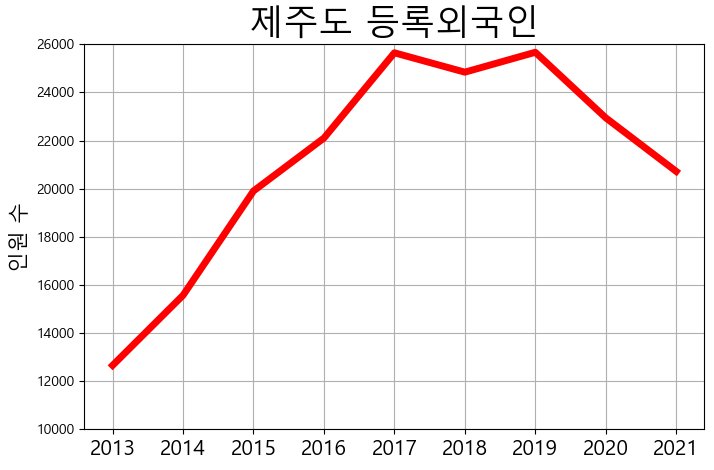

In [830]:
# 제주도 등록외국인 그래프
plt.figure(figsize=(8,5))
sns.lineplot(x=Foreigner_DF['index'],y=Foreigner_DF['전체'], color='red',linewidth=5 )
plt.title('제주도 등록외국인',size=25)
plt.ylabel('인원 수',size=15)
plt.yticks(size=10)
plt.ylim(10000,26000)
plt.xlabel('',size=105)
plt.xticks(size=15)
plt.grid(True)
plt.savefig('./제주도 등록외국인.png')
# Foreigner_DF
# plt.figure(figsize=(15,10))
# sns.lineplot(data=Foreigner_DF, x='index',y='전체')
# plt.show